In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [95]:
df1 = pd.read_csv('zomato.csv', encoding = 'utf-8')
df = df1.copy()
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [96]:
df.shape

(51717, 17)

In [97]:
df['listed_in(city)'].value_counts()

listed_in(city)
BTM                      3279
Koramangala 7th Block    2938
Koramangala 5th Block    2836
Koramangala 4th Block    2779
Koramangala 6th Block    2623
Jayanagar                2371
JP Nagar                 2096
Indiranagar              1860
Church Street            1827
MG Road                  1811
Brigade Road             1769
Lavelle Road             1744
HSR                      1741
Marathahalli             1659
Residency Road           1620
Whitefield               1620
Bannerghatta Road        1617
Brookefield              1518
Old Airport Road         1425
Kammanahalli             1329
Kalyan Nagar             1309
Basavanagudi             1266
Sarjapur Road            1261
Electronic City          1229
Bellandur                1227
Frazer Town              1185
Malleshwaram             1096
Rajajinagar              1079
Banashankari              863
New BEL Road              740
Name: count, dtype: int64

In [98]:
df.columns
df = df.drop(['address','phone','dish_liked','cuisines', 'reviews_list','menu_item','listed_in(city)'], axis =1)
df.head(3)

,url,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type)
0,https://www.zomato.com/bangalore/jalsa-banasha...,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,800,Buffet
1,https://www.zomato.com/bangalore/spice-elephan...,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,800,Buffet
2,https://www.zomato.com/SanchurroBangalore?cont...,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining",800,Buffet


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   name                         51717 non-null  object
 2   online_order                 51717 non-null  object
 3   book_table                   51717 non-null  object
 4   rate                         43942 non-null  object
 5   votes                        51717 non-null  int64 
 6   location                     51696 non-null  object
 7   rest_type                    51490 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
dtypes: int64(1), object(9)
memory usage: 3.9+ MB


In [100]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [101]:
def cleaning_rate(val):
    if (val == 'NEW' or val == '-'):
        return np.nan
    else:
        val = str(val).split('/')
        val = val[0]
        return float(val)
    
df['rate'] = df['rate'].apply(cleaning_rate)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51717 non-null  object 
 1   name                         51717 non-null  object 
 2   online_order                 51717 non-null  object 
 3   book_table                   51717 non-null  object 
 4   rate                         41665 non-null  float64
 5   votes                        51717 non-null  int64  
 6   location                     51696 non-null  object 
 7   rest_type                    51490 non-null  object 
 8   approx_cost(for two people)  51371 non-null  object 
 9   listed_in(type)              51717 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 3.9+ MB


In [102]:
df.isnull().sum()

url                                0
name                               0
online_order                       0
book_table                         0
rate                           10052
votes                              0
location                          21
rest_type                        227
approx_cost(for two people)      346
listed_in(type)                    0
dtype: int64

In [103]:
df['rate'] = df['rate'].fillna(np.round(df['rate'].mean(),1))
df.isnull().sum()

url                              0
name                             0
online_order                     0
book_table                       0
rate                             0
votes                            0
location                        21
rest_type                      227
approx_cost(for two people)    346
listed_in(type)                  0
dtype: int64

In [104]:
346+227+21

594

In [105]:
600/51000

0.011764705882352941

In [106]:
df = df.dropna()

In [107]:
df.duplicated().sum()

0

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 51167 entries, 0 to 51716
Data columns (total 10 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   url                          51167 non-null  object 
 1   name                         51167 non-null  object 
 2   online_order                 51167 non-null  object 
 3   book_table                   51167 non-null  object 
 4   rate                         51167 non-null  float64
 5   votes                        51167 non-null  int64  
 6   location                     51167 non-null  object 
 7   rest_type                    51167 non-null  object 
 8   approx_cost(for two people)  51167 non-null  object 
 9   listed_in(type)              51167 non-null  object 
dtypes: float64(1), int64(1), object(8)
memory usage: 4.3+ MB


In [109]:
df['approx_cost(for two people)'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [110]:
def cleaning_cost(amt):
    amt = str(amt)
    if ',' in amt:
        return int(amt.replace(',',''))
    else:
        return int(amt)
    
df['approx_cost(for two people)'] = df['approx_cost(for two people)'].apply(cleaning_cost)
df['approx_cost(for two people)'].unique()

array([ 800,  300,  600,  700,  550,  500,  450,  650,  400,  900,  200,
        750,  150,  850,  100, 1200,  350,  250,  950, 1000, 1500, 1300,
        199,   80, 1100,  160, 1600,  230,  130,   50,  190, 1700, 1400,
        180, 1350, 2200, 2000, 1800, 1900,  330, 2500, 2100, 3000, 2800,
       3400,   40, 1250, 3500, 4000, 2400, 2600,  120, 1450,  469,   70,
       3200,   60,  560,  240,  360, 6000, 1050, 2300, 4100, 5000, 3700,
       1650, 2700, 4500,  140])

In [111]:
df['rest_type'].value_counts()

rest_type
Quick Bites                   19048
Casual Dining                 10275
Cafe                           3687
Delivery                       2587
Dessert Parlor                 2245
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: count, Length: 93, dtype: int64

In [112]:
rest_type = df['rest_type'].value_counts()
rest_type_below_500 = rest_type[rest_type < 500]
rest_type_below_500

rest_type
Sweet Shop                    468
Bar, Casual Dining            415
Lounge                        396
Pub                           357
Fine Dining                   346
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: count, Length: 82, dtype: int64

In [113]:
def cleaned_rest_type(rtype):
    if (rtype in rest_type_below_500):
        return 'Others'
    else:
        return rtype
    
df['rest_type'] = df['rest_type'].apply(cleaned_rest_type)
df['rest_type'].unique()

array(['Casual Dining', 'Others', 'Quick Bites', 'Cafe', 'Delivery',
       'Dessert Parlor', 'Bakery', 'Takeaway, Delivery', 'Beverage Shop',
       'Bar', 'Casual Dining, Bar', 'Food Court'], dtype=object)

In [116]:
def clean_koramangala(kora):
    if ('Koramangala' in kora):
        return 'Koramangala'
    else:
        return kora
    
df['location'] = df['location'].apply(clean_koramangala)

In [117]:
location_df = df['location'].value_counts()
location_df_400 = location_df[location_df< 400]

def cleaned_location(loc):
    if (loc in location_df_400):
        return 'Others'
    else: return loc
    
df['location'] = df['location'].apply(cleaned_location)
df['location'].value_counts()

location
Koramangala          7700
BTM                  5071
Others               5018
HSR                  2496
JP Nagar             2219
Whitefield           2117
Indiranagar          2033
Jayanagar            1916
Marathahalli         1811
Bannerghatta Road    1611
Bellandur            1271
Electronic City      1249
Brigade Road         1218
Sarjapur Road        1049
Ulsoor               1017
Banashankari          906
MG Road               894
Kalyan Nagar          843
Richmond Road         804
Malleshwaram          724
Frazer Town           720
Basavanagudi          684
Residency Road        674
Brookefield           656
Banaswadi             645
New BEL Road          644
Kammanahalli          640
Rajajinagar           591
Church Street         569
Lavelle Road          523
Shanti Nagar          511
Shivajinagar          499
Cunningham Road       491
Domlur                482
Old Airport Road      437
Ejipura               434
Name: count, dtype: int64

In [118]:
df.head(5)

,url,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type)
0,https://www.zomato.com/bangalore/jalsa-banasha...,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,800,Buffet
1,https://www.zomato.com/bangalore/spice-elephan...,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,800,Buffet
2,https://www.zomato.com/SanchurroBangalore?cont...,San Churro Cafe,Yes,No,3.8,918,Banashankari,Others,800,Buffet
3,https://www.zomato.com/bangalore/addhuri-udupi...,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,300,Buffet
4,https://www.zomato.com/bangalore/grand-village...,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,600,Buffet


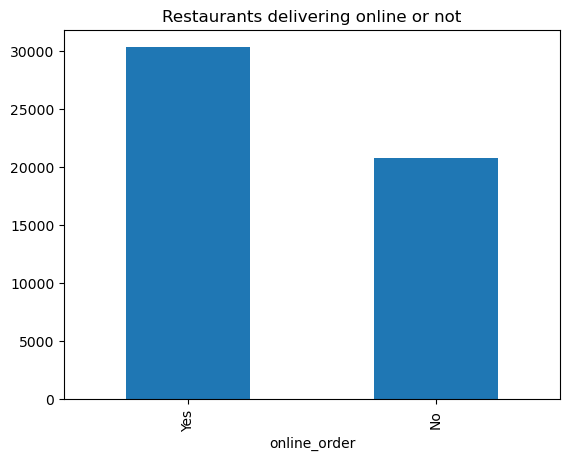

In [122]:
df['online_order'].value_counts().plot(kind = 'bar')
plt.title('Restaurants delivering online or not')
plt.show()

In [129]:
print("Rating with booking is", np.round(df[df['book_table'] == 'Yes']['rate'].mean(),2))
print("Rating without booking is", np.round(df[df['book_table'] == 'No']['rate'].mean(),2))

Rating with booking is 4.13
Rating without booking is 3.64


<Axes: xlabel='location'>

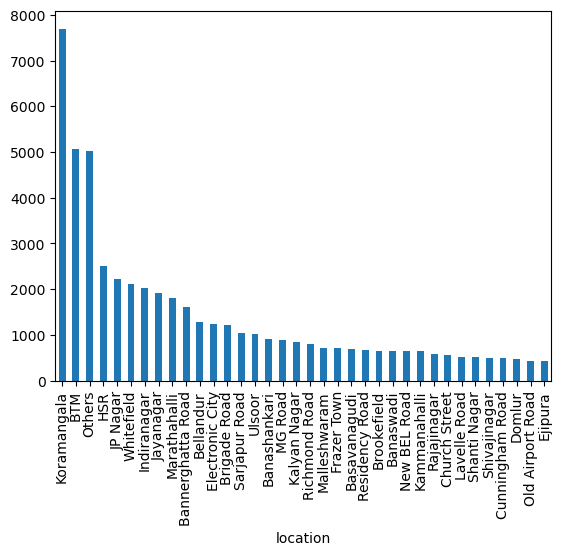

In [131]:
df['location'].value_counts().plot(kind='bar')

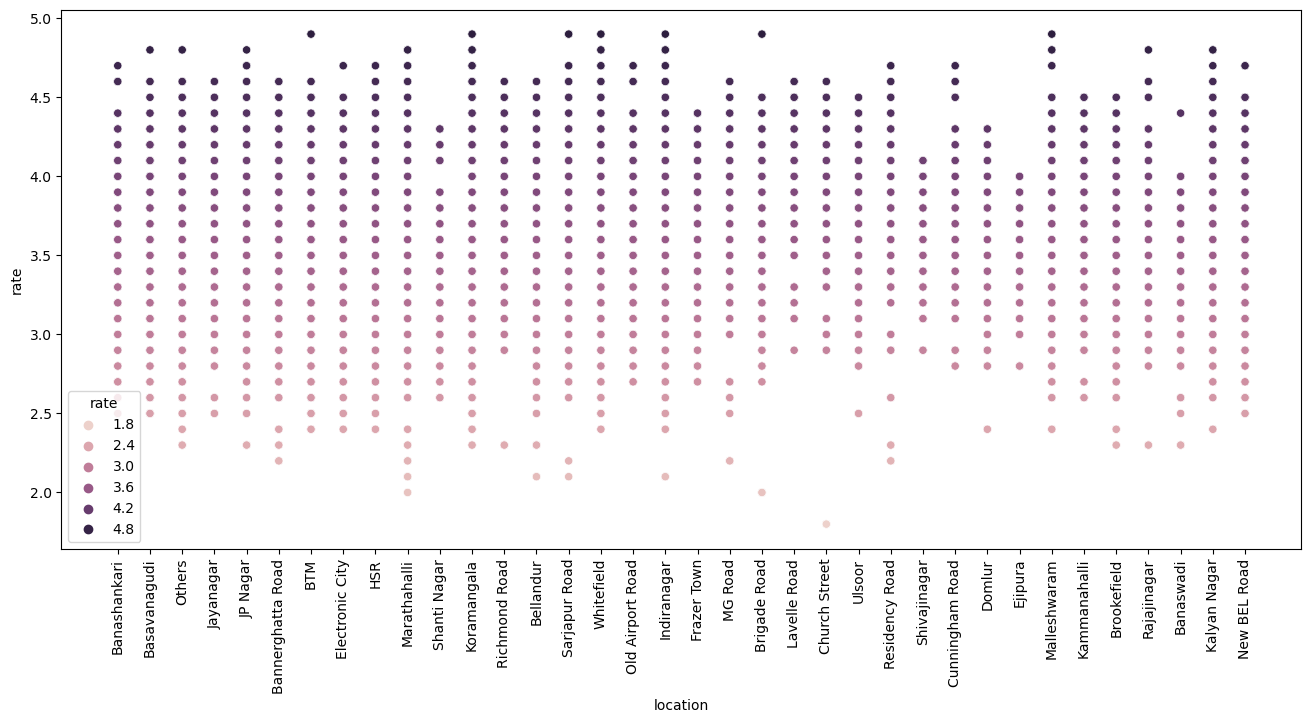

In [133]:
plt.figure(figsize=(16,7))
sns.scatterplot(data=df, x='location',y = 'rate', hue = 'rate')
plt.xticks(rotation=90)
plt.show()

In [134]:
df.head()

,url,name,online_order,book_table,rate,votes,location,rest_type,approx_cost(for two people),listed_in(type)
0,https://www.zomato.com/bangalore/jalsa-banasha...,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,800,Buffet
1,https://www.zomato.com/bangalore/spice-elephan...,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,800,Buffet
2,https://www.zomato.com/SanchurroBangalore?cont...,San Churro Cafe,Yes,No,3.8,918,Banashankari,Others,800,Buffet
3,https://www.zomato.com/bangalore/addhuri-udupi...,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,300,Buffet
4,https://www.zomato.com/bangalore/grand-village...,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,600,Buffet


<Axes: xlabel='count', ylabel='rest_type'>

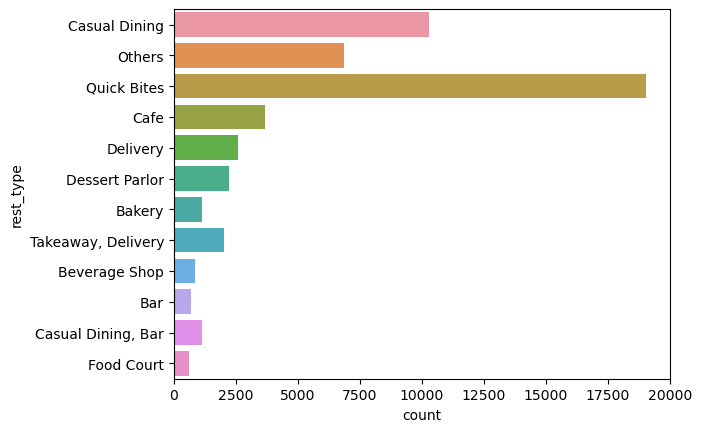

In [135]:
sns.countplot(data=df,y='rest_type')

In [136]:
df['name'].value_counts()

name
Cafe Coffee Day                                            96
Onesta                                                     85
Just Bake                                                  73
Empire Restaurant                                          71
Five Star Chicken                                          70
                                                           ..
Dil Se Punjabi                                              1
Samrat Family Restaurant & Bar                              1
Pizza Republic                                              1
Shakthi Bar and Restaurant                                  1
Plunge - Sheraton Grand Bengaluru Whitefield Hotel &...     1
Name: count, Length: 8726, dtype: int64

In [139]:
df['name'].value_counts()[:10].to_dict().items()

dict_items([('Cafe Coffee Day', 96), ('Onesta', 85), ('Just Bake', 73), ('Empire Restaurant', 71), ('Five Star Chicken', 70), ('Kanti Sweets', 68), ('Petoo', 66), ('Polar Bear', 65), ('Baskin Robbins', 64), ('Pizza Hut', 62)])

In [142]:
rest_cost = df['approx_cost(for two people)'].groupby(df['name'], sort=True)
dict1 = {}


for i, j in df['name'].value_counts()[:10].to_dict().items():
    dict1[i] = np.round(rest_cost.get_group(i).mean(),2)

In [147]:
pd.DataFrame(list(dict1.items()), columns=['Rest Name','Avg_2_ppl_cost'])

,Rest Name,Avg_2_ppl_cost
0,Cafe Coffee Day,844.79
1,Onesta,600.00
2,Just Bake,400.00
3,Empire Restaurant,685.21
4,Five Star Chicken,257.86
5,Kanti Sweets,400.00
6,Petoo,659.85
7,Polar Bear,361.54
8,Baskin Robbins,251.56
9,Pizza Hut,736.29


In [149]:
rest_rate = df['rate'].groupby(df['name'], sort=True)
dict2 = {}


for i, j in df['name'].value_counts()[:10].to_dict().items():
    dict2[i] = np.round(rest_rate.get_group(i).mean(),2)
    
pd.DataFrame(list(dict2.items()), columns=['Rest Name','Avg_rating'])

,Rest Name,Avg_rating
0,Cafe Coffee Day,3.30
1,Onesta,4.41
2,Just Bake,3.43
3,Empire Restaurant,4.02
4,Five Star Chicken,3.43
5,Kanti Sweets,3.90
6,Petoo,3.82
7,Polar Bear,4.00
8,Baskin Robbins,3.58
9,Pizza Hut,3.39
